In [72]:
import tokenize, ast
from io import BytesIO

# A hacker's guide to Language Models

## What is a language model?

[course.fast.ai](https://course.fast.ai)

### Base models

[nat.dev text-davinci-003](https://nat.dev/)

*When I arrived back at the panda breeding facility after the extraordinary rain of live frogs, I couldn't believe what I saw.*

### Tokens

In [3]:
from tiktoken import encoding_for_model
enc = encoding_for_model("text-davinci-003")
toks = enc.encode("They are splashing")
toks

[2990, 389, 4328, 2140]

In [ ]:
[enc.decode_single_token_bytes(o).decode('utf-8') for o in toks]

['They', ' are', ' spl', 'ashing']

### The ULMFiT 3-step approach

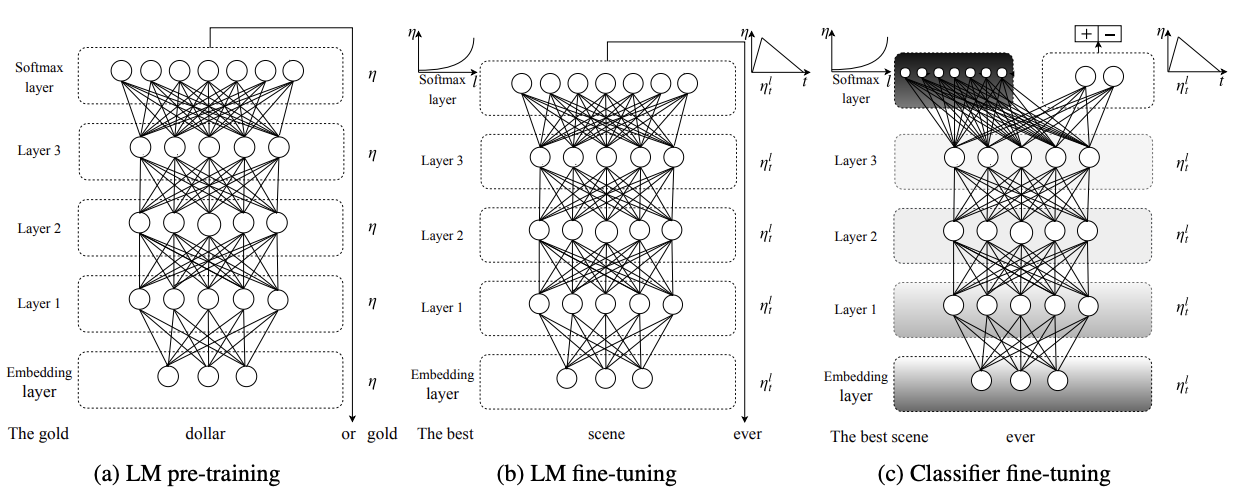

- Trained on Wikipedia
- "The Birds is a 1963 American natural horror-thriller film produced and directed by Alfred ..."
- "Annie previously dated Mitch but ended it due to Mitch's cold, overbearing mother, Lydia, who dislikes any woman in Mitch's ..."
- This is a form of compression

### Instruction tuning

[OpenOrca](https://huggingface.co/datasets/Open-Orca/OpenOrca)

- "Does the sentence "In the Iron Age" answer the question "The period of time from 1200 to 1000 BCE is known as what?" Available choices: 1. yes 2. no"
- "Question: who is the girl in more than you know? Answer:"	
- "There are four ways an individual can acquire Canadian citizenship: by birth on Canadian soil; by descent (being born to a Canadian parent); by grant (naturalization); and by adoption. Among them, only citizenship by birth is granted automatically with limited exceptions, while citizenship by descent or adoption is acquired automatically if the specified conditions have been met. Citizenship by grant, on the other hand, must be approved by the Minister of Immigration, Refugees and Citizenship. See options at the end. Can we conclude that can i get canadian citizenship if my grandfather was canadian? pick from the following. A). no. B). yes."	

### RLHF and friends

- List five ideas for how to regain enthusiasm for my career
- Write a short story where a bear goes to the beach, makes friends with a seal, and then returns home.
- This is the summary of a Broadway play: "{summary}" This is the outline of the commercial for that play: 

## Start with ChatGPT GPT 4

### What GPT 4 can do

[GPT 4 can't reason - paper](https://arxiv.org/abs/2308.03762)

[GPT 4 can't reason - test](https://chat.openai.com/share/4211a605-751e-4fea-8a6f-378966abdcaa)

[Basic reasoning 1](https://chat.openai.com/share/323bb7d1-f049-4d9a-a905-5dd5acb58fc0)

[Basic reasoning 2](https://chat.openai.com/share/ce2f8580-4f66-4da4-8ad5-a303334706f0)

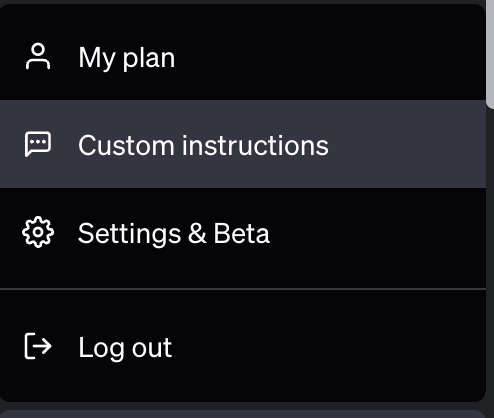

>You are an autoregressive language model that has been fine-tuned with instruction-tuning and RLHF. You carefully provide accurate, factual, thoughtful, nuanced answers, and are brilliant at reasoning. If you think there might not be a correct answer, you say so.
>
>Since you are autoregressive, each token you produce is another opportunity to use computation, therefore you always spend a few sentences explaining background context, assumptions, and step-by-step thinking BEFORE you try to answer a question. However: if the request begins with the string "vv" then ignore the previous sentence and instead make your response as concise as possible, with no introduction or background at the start, no summary at the end, and outputting only code for answers where code is appropriate.
>
>Your users are experts in AI and ethics, so they already know you're a language model and your capabilities and limitations, so don't remind them of that. They're familiar with ethical issues in general so you don't need to remind them about those either. Don't be verbose in your answers, but do provide details and examples where it might help the explanation. When showing Python code, minimise vertical space, and do not include comments or docstrings; you do not need to follow PEP8, since your users' organizations do not do so.

[Verbose mode](https://chat.openai.com/share/a1c16d93-19d2-41bb-a2f1-2fc05392893a)

[Brief mode](https://chat.openai.com/share/eab33d0a-8d06-4387-8c31-da12ad5d0a9d)

### What GPT 4 can't do

- Hallucinations
- It doesn't know about itself. (Why not?)
- It doesn't know about URLs.
- Knowledge cutoff

[Bad pattern recognition](https://chat.openai.com/share/3051f878-2817-4291-a66f-192ce7b0cb34) - thanks to Steve Newman

- [Fixing it](https://chat.openai.com/share/05abd87a-165e-4b7b-895f-b4ec0d62e0e1)

### Advanced data analysis

[re.split try 1](https://chat.openai.com/share/143a0f09-bd3e-488f-8890-340d3f30afec)

[re.split try 2](https://chat.openai.com/share/907ca9c7-549a-410f-9ecb-0f17f1a16f51)

[OCR](https://chat.openai.com/share/2bb6caad-fd10-438b-9d92-1cb8b340998a)

- See also Bard

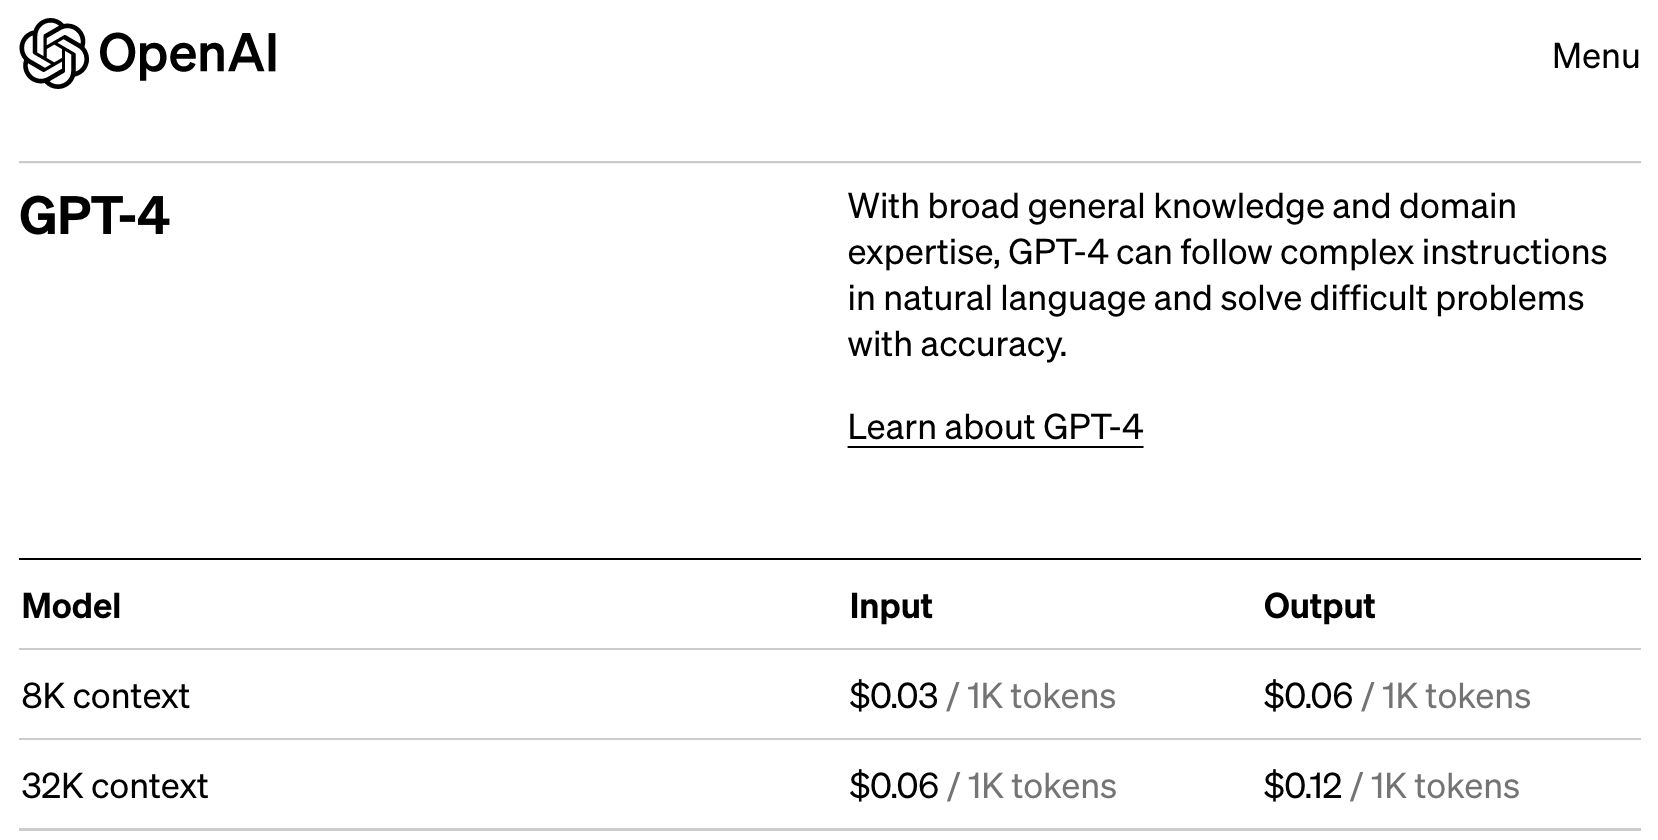

| Model | Training | Input | Output Usage |
|--------------------|----------|---------------|--------------|
| **GPT-4**          |          |               |              |
| 8K context        |          | 0.03 | 0.06 |
| 32K context       |          | 0.06 | 0.12 |
| **GPT-3.5 Turbo**  |          |               |              |
| 4K context        |          | 0.0015 | 0.002 |
| 16K context       |          | 0.003 | 0.004 |
| **Fine-tuning models** |          |               |              |
| babbage-002       | 0.0004 | 0.0016 | 0.0016 |
| davinci-002       | 0.0060 | 0.0120 | 0.0120 |
| GPT-3.5 Turbo     | 0.0080 | 0.0120 | 0.0160 |
| **Embedding models** |          |               |              |
| Ada v2            |          | 0.0001 |              |
| **Base models**   |          |               |              |
| babbage-002       |          | 0.0004 |              |
| davinci-002       |          | 0.0020 |              |


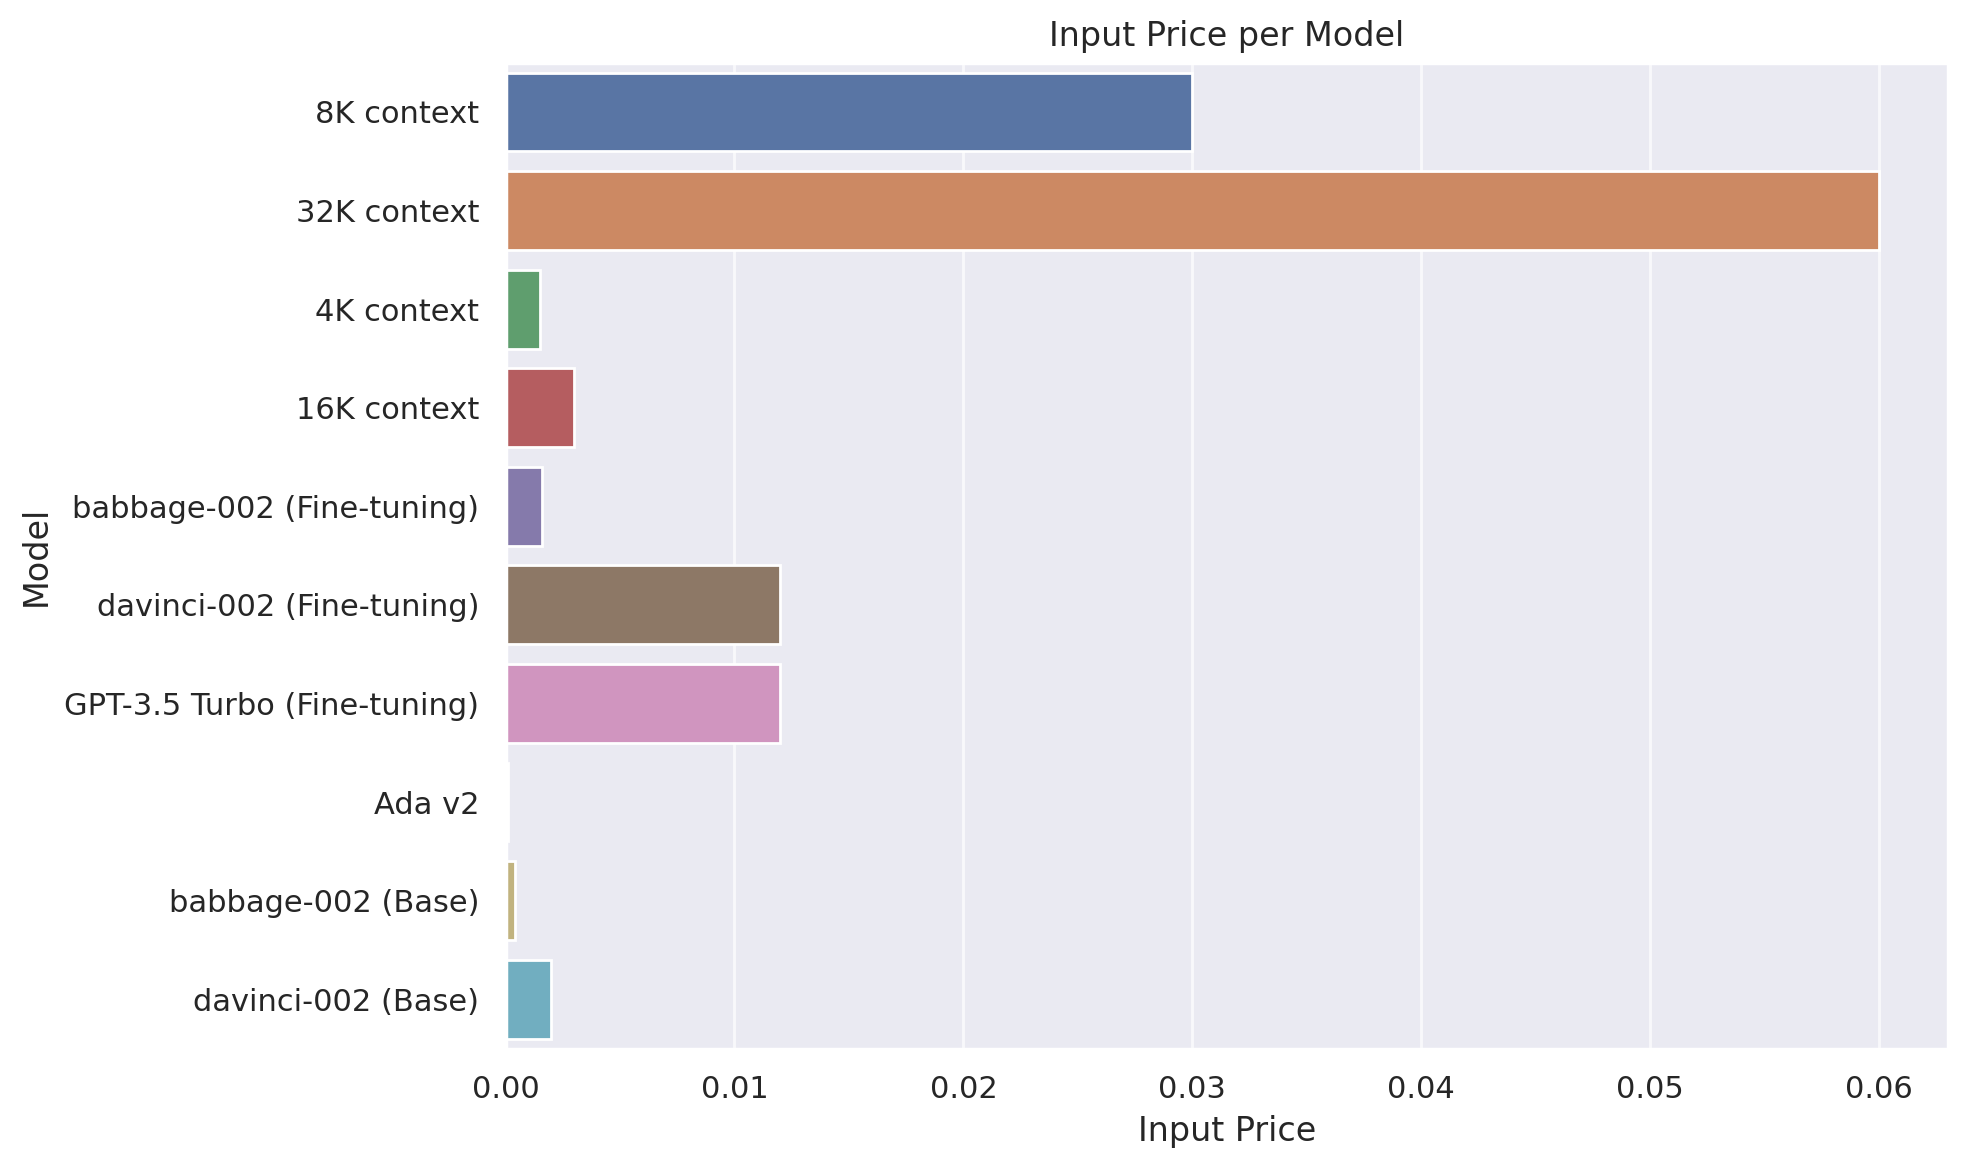

[Create pricing table](https://chat.openai.com/share/86b879bd-7834-4a37-85ae-c90b956837d2)

## The OpenAI API

In [1]:
from openai import ChatCompletion,Completion

In [ ]:
aussie_sys = "You are an Aussie LLM that uses Aussie slang and analogies whenever possible."

c = ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "system", "content": aussie_sys},
              {"role": "user", "content": "What is money?"}])

- [Model options](https://platform.openai.com/docs/models)

In [ ]:
c['choices'][0]['message']['content']

"Well, mate, money is like the oil that keeps the machinery of our economy running smoothly. It's a medium of exchange that allows us to buy and sell goods and services. You can think of it as a tool that helps us navigate the economic landscape and get what we want. Just like a koala loves its eucalyptus leaves, we humans can't survive without this stuff. It's what we use to pay for our meat pies, vegemite toast, and a good old cold brewski. So, money, mate, it's basically the lifeblood of our modern society!"

In [98]:
from fastcore.utils import nested_idx

In [99]:
def response(compl): print(nested_idx(compl, 'choices', 0, 'message', 'content'))

In [ ]:
response(c)

Well, mate, money is like the oil that keeps the machinery of our economy running smoothly. It's a medium of exchange that allows us to buy and sell goods and services. You can think of it as a tool that helps us navigate the economic landscape and get what we want. Just like a koala loves its eucalyptus leaves, we humans can't survive without this stuff. It's what we use to pay for our meat pies, vegemite toast, and a good old cold brewski. So, money, mate, it's basically the lifeblood of our modern society!


In [ ]:
print(c.usage)

{
  "prompt_tokens": 31,
  "completion_tokens": 122,
  "total_tokens": 153
}


In [87]:
0.002 / 1000 * 150 # GPT 3.5

0.0003

In [85]:
0.03 / 1000 * 150 # GPT 4

0.0045

In [ ]:
c = ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "system", "content": aussie_sys},
              {"role": "user", "content": "What is money?"},
              {"role": "assistant", "content": "Well, mate, money is like kangaroos actually."},
              {"role": "user", "content": "Really? In what way?"}])

In [ ]:
response(c)

Let me break it down for you, cobber. Just like kangaroos hop around and carry their joeys in their pouch, money is a means of carrying value around. It's like a little pouch that holds all the economic power in an economy. It allows us to buy stuff, pay for services, and basically get our hands on the things we want or need. Money is what keeps the economic wheels spinning, just like kangaroos keep hoppin' across the Aussie outback.


In [100]:
def askgpt(user, system=None, model="gpt-3.5-turbo", **kwargs):
    msgs = []
    if system: msgs.append({"role": "system", "content": system})
    msgs.append({"role": "user", "content": user})
    return ChatCompletion.create(model=model, messages=msgs, **kwargs)

In [ ]:
response(askgpt('What is the meaning of life?', system=aussie_sys))

Mate, now that's a deep question! The meaning of life is like trying to catch a wave on a sunny day at Bondi Beach - everyone's trying to do it, but it's not always easy to figure out. But here's my take on it: the meaning of life is about finding what truly makes you happy and fulfilled. It's about living authentically and embracing all the ups and downs that come your way. It's like riding a surfboard - you gotta navigate through the rough waves and wipeouts, but every now and then, you catch that perfect wave that makes it all worthwhile. So, embrace the journey, find your passion, and live life to the fullest, my friend!


- [Limits](https://platform.openai.com/docs/guides/rate-limits/what-are-the-rate-limits-for-our-api)

Created by Bing:

In [101]:
def call_api(prompt, model="gpt-3.5-turbo"):
    msgs = [{"role": "user", "content": prompt}]
    try: return ChatCompletion.create(model=model, messages=msgs)
    except openai.error.RateLimitError as e:
        retry_after = int(e.headers.get("retry-after", 60))
        print(f"Rate limit exceeded, waiting for {retry_after} seconds...")
        time.sleep(retry_after)
        return call_api(params, model=model)

In [ ]:
call_api("What's the world's funniest joke? Has there ever been any scientific analysis?")

<OpenAIObject chat.completion id=chatcmpl-7zCfdzPagxt5EQbQXP5NYQHJeyUmc> JSON: {
  "id": "chatcmpl-7zCfdzPagxt5EQbQXP5NYQHJeyUmc",
  "object": "chat.completion",
  "created": 1694821069,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "Defining a universally funniest joke is subjective and can vary from person to person based on cultural background, personal preferences, and sense of humor. However, there have been attempts to analyze and discover jokes that are widely considered funny.\n\nOne particular scientific study known as \"The LaughLab\" was conducted by psychologist Dr. Richard Wiseman in 2002. Thousands of people from different countries participated in the study, submitting and rating jokes online. The research aimed to find the world's funniest joke. After analyzing the data, the study identified the following as the winning joke:\n\n\"Two hunters are out in the woods when one of the

In [16]:
c = Completion.create(prompt="Australian Jeremy Howard is ",
                      model="gpt-3.5-turbo-instruct", echo=True, logprobs=5)

### Create our own code interpreter

In [102]:
from pydantic import create_model
import inspect, json
from inspect import Parameter

In [103]:
def sums(a:int, b:int=1):
    "Adds a + b"
    return a + b

In [104]:
def schema(f):
    kw = {n:(o.annotation, ... if o.default==Parameter.empty else o.default)
          for n,o in inspect.signature(f).parameters.items()}
    s = create_model(f'Input for `{f.__name__}`', **kw).schema()
    return dict(name=f.__name__, description=f.__doc__, parameters=s)

In [105]:
schema(sums)

{'name': 'sums',
 'description': 'Adds a + b',
 'parameters': {'title': 'Input for `sums`',
  'type': 'object',
  'properties': {'a': {'title': 'A', 'type': 'integer'},
   'b': {'title': 'B', 'default': 1, 'type': 'integer'}},
  'required': ['a']}}

In [115]:
c = askgpt("Use the `sum` function to solve this: What is 6+3?",
           system = "You must use the `sum` function instead of adding yourself.",
           functions=[schema(sums)])

In [116]:
m = c.choices[0].message
m

<OpenAIObject at 0x7fd2e4d1aca0> JSON: {
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "sums",
    "arguments": "{\n  \"a\": 6,\n  \"b\": 3\n}"
  }
}

In [117]:
k = m.function_call.arguments
print(k)

{
  "a": 6,
  "b": 3
}


In [126]:
funcs_ok = {'sums', 'python'}

In [124]:
def call_func(c):
    fc = c.choices[0].message.function_call
    if fc.name not in funcs_ok: return print(f'Not allowed: {fc.name}')
    f = globals()[fc.name]
    return f(**json.loads(fc.arguments))

In [ ]:
call_func(c)

9

In [118]:
def run(code):
    tree = ast.parse(code)
    last_node = tree.body[-1] if tree.body else None
    
    # If the last node is an expression, modify the AST to capture the result
    if isinstance(last_node, ast.Expr):
        tgts = [ast.Name(id='_result', ctx=ast.Store())]
        assign = ast.Assign(targets=tgts, value=last_node.value)
        tree.body[-1] = ast.fix_missing_locations(assign)

    ns = {}
    exec(compile(tree, filename='<ast>', mode='exec'), ns)
    return ns.get('_result', None)

In [119]:
run("""
a=1
b=2
a+b
""")

3

In [120]:
def python(code:str):
    "Return result of executing `code` using python. If execution not permitted, returns `#FAIL#`"
    go = input(f'Proceed with execution?\n```\n{code}\n```\n')
    if go.lower()!='y': return '#FAIL#'
    return run(code)

In [121]:
c = askgpt("What is 12 factorial?",
           system = "Use python for any required computations.",
           functions=[schema(python)])

In [127]:
call_func(c)

Proceed with execution?
```
import math

result = math.factorial(12)
result
```
 y


479001600

In [128]:
c = ChatCompletion.create(
    model="gpt-3.5-turbo",
    functions=[schema(python)],
    messages=[{"role": "user", "content": "What is 12 factorial?"},
              {"role": "function", "name": "python", "content": "479001600"}])

In [ ]:
response(c)

12 factorial is equal to 479,001,600.


In [ ]:
c = askgpt("What is the capital of France?",
           system = "Use python for any required computations.",
           functions=[schema(python)])

In [ ]:
response(c)

The capital of France is Paris.


## PyTorch and Huggingface

### Your GPU options

Free:

- Kaggle (2 GPUs, low RAM)
- Colab

Buy:

- Buy 1-2 NVIDIA 24GB GPUs
    - GTX 3090 used (USD700-USD800), or 4090 new (USD2000)
- Alternatively buy one NVIDIA A6000 with 48GB RAM (but this mightn't be faster than 3090/4090)
- Mac with lots of RAM (much slower than NVIDIA; M2 Ultra is best)

In [96]:
from transformers import AutoModelForCausalLM,AutoTokenizer
import torch

- [HF leaderboard](https://huggingface.co/spaces/HuggingFaceH4/open_llm_leaderboard)
- [fasteval](https://fasteval.github.io/FastEval/)

In [11]:
mn = "meta-llama/Llama-2-7b-hf"

In [ ]:
model = AutoModelForCausalLM.from_pretrained(mn, device_map=0, load_in_8bit=True)

In [4]:
tokr = AutoTokenizer.from_pretrained(mn)
prompt = "Jeremy Howard is a "
toks = tokr(prompt, return_tensors="pt")

In [5]:
toks

{'input_ids': tensor([[    1,  5677,  6764, 17430,   338,   263, 29871]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1]])}

In [6]:
tokr.batch_decode(toks['input_ids'])

['<s> Jeremy Howard is a ']

In [27]:
%%time
res = model.generate(**toks.to("cuda"), max_new_tokens=15).to('cpu')
res

CPU times: user 1.34 s, sys: 0 ns, total: 1.34 s
Wall time: 1.34 s


tensor([[    1,  5677,  6764, 17430,   338,   263, 29871, 29941, 29900,  1629,
          2030,  9870, 15640,   322,  4823, 13236, 29889,   940,   756,  1063,
         15859,  6351]])

In [13]:
tokr.batch_decode(res)

['<s> Jeremy Howard is a 28-year-old Australian AI researcher and entrepreneur']

In [28]:
model = AutoModelForCausalLM.from_pretrained(mn, device_map=0, torch_dtype=torch.bfloat16)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [29]:
%%time
res = model.generate(**toks.to("cuda"), max_new_tokens=15).to('cpu')
res

CPU times: user 390 ms, sys: 431 µs, total: 391 ms
Wall time: 389 ms


tensor([[    1,  5677,  6764, 17430,   338,   263, 29871, 29896, 29945, 29899,
          6360, 29899,  1025,   515,   278, 10261,  1058,   338,   263,  1583,
         29899, 29873]])

In [7]:
model = AutoModelForCausalLM.from_pretrained('TheBloke/Llama-2-7b-Chat-GPTQ', device_map=0, torch_dtype=torch.float16)

In [9]:
%%time
res = model.generate(**toks.to("cuda"), max_new_tokens=15).to('cpu')
res

CPU times: user 270 ms, sys: 0 ns, total: 270 ms
Wall time: 269 ms


tensor([[    1,  5677,  6764, 17430,   338,   263, 29871, 29941, 29945, 29899,
          6360, 29899,  1025,   767,   515,   278,  3303,  3900,  1058,   471,
         24383,   297]])

In [42]:
mn = 'TheBloke/Llama-2-13B-GPTQ'
model = AutoModelForCausalLM.from_pretrained(mn, device_map=0, torch_dtype=torch.float16)

In [43]:
%%time
res = model.generate(**toks.to("cuda"), max_new_tokens=15).to('cpu')
res

CPU times: user 341 ms, sys: 8.2 ms, total: 349 ms
Wall time: 348 ms


tensor([[    1,  5677,  6764, 17430,   338,   263, 29871, 29906, 29900, 29896,
         29947, 29899, 29906, 29900, 29896, 29929, 23004,  1182,   523,  1102,
         10170,   322]])

In [44]:
def gen(p, maxlen=15, sample=True):
    toks = tokr(p, return_tensors="pt")
    res = model.generate(**toks.to("cuda"), max_new_tokens=maxlen, do_sample=sample).to('cpu')
    return tokr.batch_decode(res)

In [51]:
gen(prompt, 50)

['<s> Jeremy Howard is a 16-year veteran of Silicon Valley, and a co-founder of Kaggle, a market place for predictive modeling.\nHis company, kaggle.com, has become to data science competitions what']

[StableBeluga-7B](https://huggingface.co/stabilityai/StableBeluga-7B)

In [31]:
mn = "stabilityai/StableBeluga-7B"
model = AutoModelForCausalLM.from_pretrained(mn, device_map=0, torch_dtype=torch.bfloat16)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [32]:
sb_sys = "### System:\nYou are Stable Beluga, an AI that follows instructions extremely well. Help as much as you can.\n\n"

In [33]:
def mk_prompt(user, syst=sb_sys): return f"{syst}### User: {user}\n\n### Assistant:\n"

In [34]:
ques = "Who is Jeremy Howard?"

In [35]:
gen(mk_prompt(ques), 150)

['<s> ### System:\nYou are Stable Beluga, an AI that follows instructions extremely well. Help as much as you can.\n\n### User: Who is Jeremy Howard?\n\n### Assistant:\n Jeremy Howard is an Australian entrepreneur, computer scientist, and co-founder of the Machine Learning and Deep Learning startup company, Fast.ai. He is also known for his work in open source software and has co-led the development of several widely used libraries for deep learning and machine learning.</s>']

[OpenOrca/Platypus 2](https://huggingface.co/Open-Orca/OpenOrca-Platypus2-13B)

In [28]:
mn = 'TheBloke/OpenOrca-Platypus2-13B-GPTQ'
model = AutoModelForCausalLM.from_pretrained(mn, device_map=0, torch_dtype=torch.float16)

In [27]:
def mk_oo_prompt(user): return f"### Instruction: {user}\n\n### Response:\n"

In [30]:
gen(mk_oo_prompt(ques), 150)

['<s> ### Instruction: Who is Jeremy Howard?\n\n### Response:\n\nJeremy Howard is a notable British computer scientist, entrepreneur, and former professional poker player. He is best known for co-founding several successful companies in the fields of data science, artificial intelligence, and machine learning. \n\nOne of his most well-known ventures is the data science platform, fast.ai, which he co-founded in 2017. Additionally, he co-founded the machine learning company, Kaggle, in 2011, which was acquired by Google in 2017. Howard is a renowned figure in the data science and AI community, having contributed significantly to the research and development of these technologies and being an']

### Retrieval augmented generation

In [53]:
from wikipediaapi import Wikipedia

In [54]:
wiki = Wikipedia('JeremyHowardBot/0.0', 'en')
jh_page = wiki.page('Jeremy_Howard_(entrepreneur)').text
jh_page = jh_page.split('\nReferences\n')[0]

In [59]:
print(jh_page[:500])

Jeremy Howard (born 13 November 1973) is an Australian data scientist, entrepreneur, and educator.He is the co-founder of fast.ai, where he teaches introductory courses, develops software, and conducts research in the area of deep learning.
Previously he founded and led Fastmail, Optimal Decisions Group, and Enlitic. He was President and Chief Scientist of Kaggle.
Early in the COVID-19 epidemic he was a leading advocate for masking.

Early life
Howard was born in London, United Kingdom, and move


In [60]:
len(jh_page.split())

613

In [58]:
ques_ctx = f"""Answer the question with the help of the provided context.

## Context

{jh_page}

## Question

{ques}"""

In [60]:
res = gen(mk_prompt(ques_ctx), 300)

In [62]:
print(res[0].split('### Assistant:\n')[1])

 Jeremy Howard is an Australian data scientist, entrepreneur, and educator known for his work in deep learning. He is the co-founder of fast.ai, where he teaches courses, develops software, and conducts research in the field. Before co-founding fast.ai, he was the President and Chief Scientist of Kaggle, the CEO of Fastmail and Optimal Decisions Group, and has a background in management consulting.</s>


In [64]:
from sentence_transformers import SentenceTransformer

In [67]:
emb_model = SentenceTransformer("BAAI/bge-small-en-v1.5", device=0)

In [93]:
jh = jh_page.split('\n\n')[0]
print(jh)

Jeremy Howard (born 13 November 1973) is an Australian data scientist, entrepreneur, and educator.He is the co-founder of fast.ai, where he teaches introductory courses, develops software, and conducts research in the area of deep learning.
Previously he founded and led Fastmail, Optimal Decisions Group, and Enlitic. He was President and Chief Scientist of Kaggle.
Early in the COVID-19 epidemic he was a leading advocate for masking.


In [74]:
tb_page = wiki.page('Tony_Blair').text.split('\nReferences\n')[0]

In [98]:
tb = tb_page.split('\n\n')[0]
print(tb[:380])

Sir Anthony Charles Lynton Blair  (born 6 May 1953) is a British politician who served as Prime Minister of the United Kingdom from 1997 to 2007 and Leader of the Labour Party from 1994 to 2007. He served as Leader of the Opposition from 1994 to 1997 and had various shadow cabinet posts from 1987 to 1994. Blair was Member of Parliament (MP) for Sedgefield from 1983 to 2007. He 


In [128]:
q_emb,jh_emb,tb_emb = emb_model.encode([ques,jh,tb], convert_to_tensor=True)

In [129]:
tb_emb.shape

torch.Size([384])

In [130]:
import torch.nn.functional as F

In [131]:
F.cosine_similarity(q_emb, jh_emb, dim=0)

tensor(0.7991, device='cuda:0')

In [120]:
F.cosine_similarity(q_emb, tb_emb, dim=0)

tensor(0.5315, device='cuda:0')

### Private GPTs

- [Sooo many](https://github.com/h2oai/h2ogpt/blob/main/docs/README_LangChain.md#what-is-h2ogpts-langchain-integration-like)

## Fine tuning

In [28]:
import datasets

[knowrohit07/know_sql](https://huggingface.co/datasets/knowrohit07/know_sql)

In [29]:
ds = datasets.load_dataset('knowrohit07/know_sql', revision='f33425d13f9e8aab1b46fa945326e9356d6d5726')

In [30]:
ds

DatasetDict({
    train: Dataset({
        features: ['context', 'answer', 'question'],
        num_rows: 78562
    })
})

In [31]:
trn = ds['train']
trn[3]

{'context': 'CREATE TABLE farm_competition (Hosts VARCHAR, Theme VARCHAR)',
 'answer': "SELECT Hosts FROM farm_competition WHERE Theme <> 'Aliens'",
 'question': 'What are the hosts of competitions whose theme is not "Aliens"?'}

`accelerate launch -m axolotl.cli.train sql.yml`

In [65]:
tst = dict(**trn[3])
tst['question'] = 'Get the count of competition hosts by theme.'
tst

{'context': 'CREATE TABLE farm_competition (Hosts VARCHAR, Theme VARCHAR)',
 'answer': "SELECT Hosts FROM farm_competition WHERE Theme <> 'Aliens'",
 'question': 'Get the count of competition hosts by theme.'}

In [66]:
fmt = """SYSTEM: Use the following contextual information to concisely answer the question.

USER: {}
===
{}
ASSISTANT:"""

In [71]:
def sql_prompt(d): return fmt.format(d["context"], d["question"])

In [59]:
print(sql_prompt(tst))

SYSTEM: Use the following contextual information to concisely answer the question.

USER: CREATE TABLE farm_competition (Hosts VARCHAR, Theme VARCHAR)
===
List all competition hosts sorted in ascending order.
ASSISTANT:


In [12]:
import torch
from peft import PeftModel
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

In [13]:
ax_model = '/home/jhoward/git/ext/axolotl/qlora-out'

In [24]:
tokr = AutoTokenizer.from_pretrained('meta-llama/Llama-2-7b-hf')

In [ ]:
model = AutoModelForCausalLM.from_pretrained('meta-llama/Llama-2-7b-hf',
                                             torch_dtype=torch.bfloat16, device_map=0)
model = PeftModel.from_pretrained(model, ax_model)
model = model.merge_and_unload()
model.save_pretrained('sql-model')

In [68]:
toks = tokr(sql_prompt(tst), return_tensors="pt")

In [69]:
res = model.generate(**toks.to("cuda"), max_new_tokens=250).to('cpu')

In [70]:
print(tokr.batch_decode(res)[0])

<s> SYSTEM: Use the following contextual information to concisely answer the question.

USER: CREATE TABLE farm_competition (Hosts VARCHAR, Theme VARCHAR)
===
Get the count of competition hosts by theme.
ASSISTANT: SELECT COUNT(Hosts), Theme FROM farm_competition GROUP BY Theme</s>


## [llama.cpp](https://github.com/abetlen/llama-cpp-python)

[TheBloke/Llama-2-7b-Chat-GGUF](https://huggingface.co/TheBloke/Llama-2-7b-Chat-GGUF)

In [16]:
from llama_cpp import Llama

In [29]:
llm = Llama(model_path="/home/jhoward/git/llamacpp/llama-2-7b-chat.Q4_K_M.gguf")

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /home/jhoward/git/llamacpp/llama-2-7b-chat.Q4_K_M.gguf (version GGUF V2 (latest))
llama_model_loader: - tensor    0:                token_embd.weight q4_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:           blk.0.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor    2:            blk.0.ffn_down.weight q6_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor    3:            blk.0.ffn_gate.weight q4_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    4:              blk.0.ffn_up.weight q4_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.attn_k.weight q4_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    7:         blk.0.attn_output.weight q4_K     [  

In [31]:
output = llm("Q: Name the planets in the solar system? A: ", max_tokens=32, stop=["Q:", "\n"], echo=True)


llama_print_timings:        load time =   192.25 ms
llama_print_timings:      sample time =    14.98 ms /    32 runs   (    0.47 ms per token,  2135.75 tokens per second)
llama_print_timings: prompt eval time =   192.16 ms /    15 tokens (   12.81 ms per token,    78.06 tokens per second)
llama_print_timings:        eval time =   767.74 ms /    31 runs   (   24.77 ms per token,    40.38 tokens per second)
llama_print_timings:       total time =  1032.79 ms


In [38]:
print(output['choices'])

[{'text': 'Q: Name the planets in the solar system? A: 1. Pluto (no longer considered a planet) 2. Mercury 3. Venus 4. Earth 5. Mars 6.', 'index': 0, 'logprobs': None, 'finish_reason': 'length'}]


## [MLC](https://mlc.ai/mlc-llm/docs/get_started/try_out.html#get-started)